# Bank Customer Segmentation

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Import DataSet and Libraries

In [188]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [44]:
creditcard_df = pd.read_csv("marketing_data.csv")
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [32]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [20]:
creditcard_df["BALANCE"].describe()

count     8950.000000
mean      1564.474828
std       2081.531879
min          0.000000
25%        128.281915
50%        873.385231
75%       2054.140036
max      19043.138560
Name: BALANCE, dtype: float64

In [27]:
l= ["CASH_ADVANCE_FREQUENCY", "CASH_ADVANCE", "ONEOFF_PURCHASES" ,                   
"CASH_ADVANCE_TRX" ]
creditcard_df[l].describe()
creditcard_df[l].idxmax()
creditcard_df.iloc[2159]

CUST_ID                               C12226
BALANCE                              10905.1
BALANCE_FREQUENCY                          1
PURCHASES                             431.93
ONEOFF_PURCHASES                       133.5
INSTALLMENTS_PURCHASES                298.43
CASH_ADVANCE                         47137.2
PURCHASES_FREQUENCY                 0.583333
ONEOFF_PURCHASES_FREQUENCY              0.25
PURCHASES_INSTALLMENTS_FREQUENCY         0.5
CASH_ADVANCE_FREQUENCY                     1
CASH_ADVANCE_TRX                         123
PURCHASES_TRX                             21
CREDIT_LIMIT                           19600
PAYMENTS                             39048.6
MINIMUM_PAYMENTS                     5394.17
PRC_FULL_PAYMENT                           0
TENURE                                    12
Name: 2159, dtype: object

In [30]:
creditcard_df[l].idxmax()
#creditcard_df.iloc[550]
creditcard_df[creditcard_df["ONEOFF_PURCHASES"]==40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


## Visualise and Explore Dataset

In [33]:
#Lets see if there any missing elements

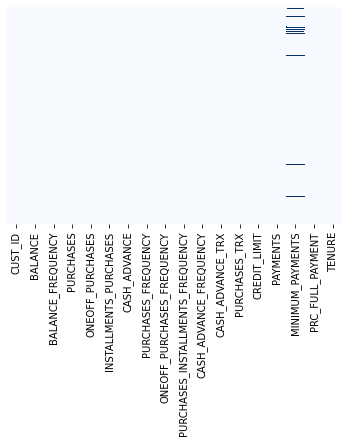

In [49]:
sns.heatmap(creditcard_df.isna(), yticklabels = False, cbar = False, cmap = 'Blues')

In [50]:
creditcard_df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [53]:
#To fill NA Values of MINIMUM_PAYMENTS
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isna() == True), "MINIMUM_PAYMENTS"] = creditcard_df["MINIMUM_PAYMENTS"].mean()

In [57]:
#To fill NA Values of CREDIT_LIMIT
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT']).isna() == True, "CREDIT_LIMIT"] = creditcard_df["CREDIT_LIMIT"].mean()

In [58]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [59]:
#To see if any entries in df is dupilcate
creditcard_df.duplicated().sum()

0

In [72]:
#Dropping column of CUSTOMER ID
creditcard_df.drop("CUST_ID", axis =1, inplace = True)

In [67]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [75]:
len_col = len(creditcard_df.columns)
len_col

17

In [76]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

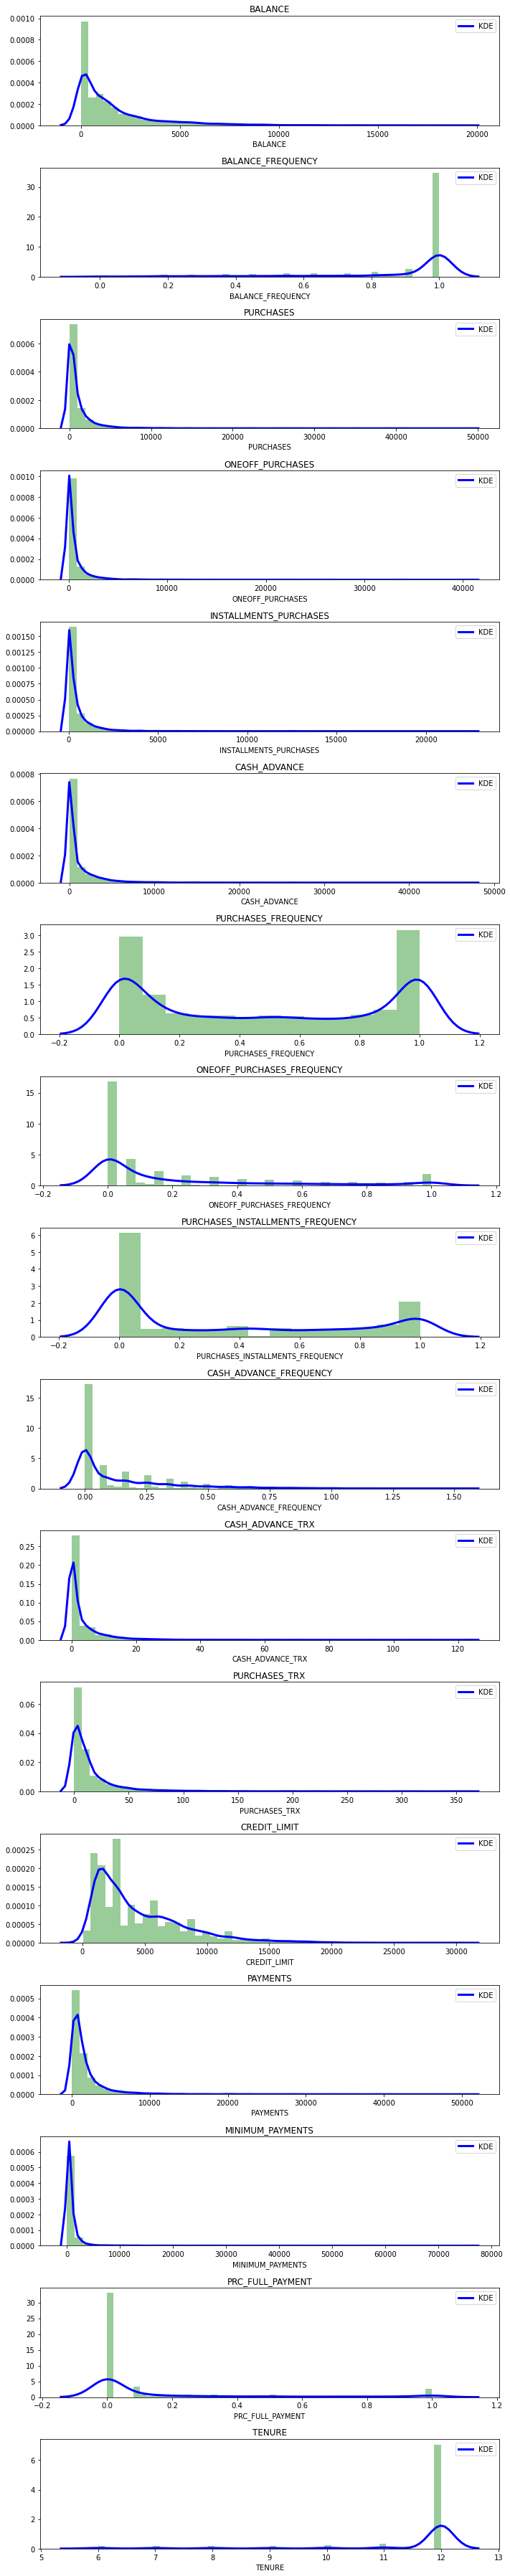

In [86]:
#Distance Plot which combines matplotlib.hist function with seaborn kdeplot()
plt.figure(figsize = (10, 50))
for i in range(len(creditcard_df.columns)):
    plt.subplot(17, 1, i+1)
    sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={'color' : 'b', 'lw':3, 'label':'KDE'}, 
                 hist_kws = {'color' : 'g'})
    plt.title(creditcard_df.columns[i])
plt.tight_layout()

In [90]:
#Correlation Matrix
corr_mat =creditcard_df.corr()

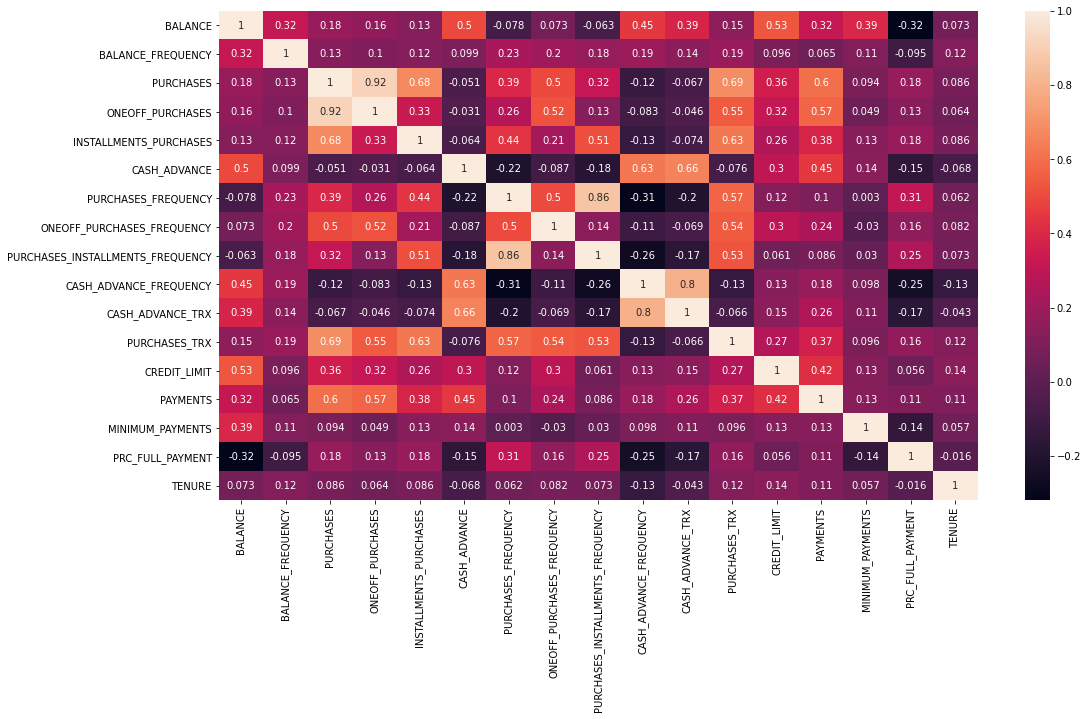

In [102]:
plt.figure(figsize = (17, 9))
#f, ax = plt.subplots(figsize = (17, 9))
sns.heatmap(corr_mat, annot = True)

## Using Elbow method to get optimal K

In [172]:
#let's scale the data
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [173]:
creditcard_df_scaled.shape

(8950, 17)

In [174]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

Text(0, 0.5, 'Within Cluster Sum of Squares (WCSS)')

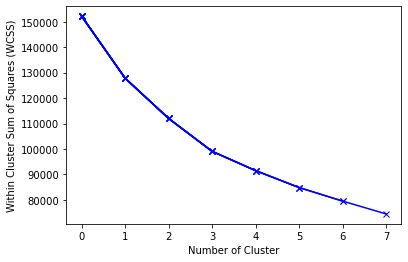

In [215]:
#Applying K-Means Algorithm
scores_1 = []
range_values = range(1,9)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans = kmeans.fit(creditcard_df_scaled)
    scores_1.append(kmeans.inertia_)
    plt.plot(scores_1, 'bx-')
plt.xlabel("Number of Cluster")
plt.ylabel("Within Cluster Sum of Squares (WCSS)")

#### K-Means Clustering for 1st seven columns in the Dataset

In [141]:
# L is the list of first seven columns
creditcard_df_l = creditcard_df[creditcard_df.columns[:7]]

In [146]:
#let's scale the data
scaler = StandardScaler()
creditcard_df_scaled_l = scaler.fit_transform(creditcard_df_l)
creditcard_df_scaled_l.shape

(8950, 7)

Text(0.5, 0, 'Number of Cluster')

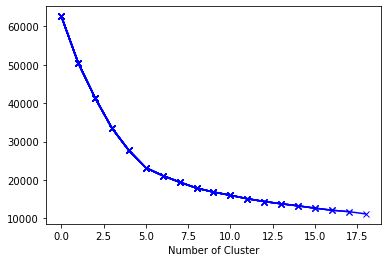

In [162]:
scores_1 = []
range_values = range(1,20)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans = kmeans.fit(creditcard_df_scaled_l)
    #kmeans = kmeans.fit(creditcard_df_scaled[:, 7:])
    scores_1.append(kmeans.inertia_)
    plt.plot(scores_1, 'bx-')
plt.xlabel("Number of Cluster")

## Applying K-Means Clustering

In [176]:
kmeans = KMeans(7)
kmeans = kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_ #Labels associated with each data point

In [177]:
#To get the centroid of all 7 clusters
kmeans.cluster_centers_.shape

(7, 17)

In [178]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.368459,0.330240,-0.040004,-0.235493,0.337878,-0.369447,0.980776,-0.360416,1.174277,-0.479692,-0.363527,0.173605,-0.279733,-0.222523,-0.015486,0.309256,0.254036
1,0.007572,0.402578,-0.343831,-0.225095,-0.399336,-0.104339,-0.810055,-0.336035,-0.752333,0.084585,-0.041876,-0.464562,-0.301248,-0.248932,-0.015896,-0.452870,0.271810
2,-0.701828,-2.136168,-0.307232,-0.230688,-0.302515,-0.320818,-0.547978,-0.429080,-0.441452,-0.521898,-0.376692,-0.416805,-0.170933,-0.192057,-0.257326,0.297891,0.202040
3,1.669036,0.395826,-0.205031,-0.149681,-0.209888,1.990501,-0.455932,-0.189722,-0.403469,1.910974,1.924625,-0.241022,1.007329,0.823233,0.553641,-0.394839,0.069481
4,1.430238,0.419467,6.915048,6.083034,5.172266,0.038778,1.090699,1.879303,1.049413,-0.249227,-0.038166,4.646228,2.198371,4.783704,1.080945,0.824001,0.334613
5,-0.336070,-0.346074,-0.284289,-0.209289,-0.287337,0.066255,-0.195396,-0.273269,-0.227170,0.302768,-0.002789,-0.385220,-0.550772,-0.389433,-0.209619,0.011192,-3.189604
6,0.126924,0.430008,0.936481,0.893318,0.573104,-0.308187,1.092347,1.870640,0.535516,-0.407954,-0.319396,1.194797,0.698390,0.383921,-0.057307,0.454050,0.307809


In [179]:
#Inverse tranformation of the number to get make sense of the numbers
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,797.559155,0.955502,917.735753,201.567317,716.606533,204.123451,0.883984,0.094939,0.831125,0.039153,0.768024,19.025012,3476.665131,1088.960637,828.116740,0.244167,11.857283
1,1580.235683,0.972638,268.605454,218.826105,49.953480,760.066553,0.165236,0.102212,0.065441,0.152070,2.963054,3.162562,3398.387286,1012.510210,827.161759,0.021258,11.881070
2,103.679857,0.371232,346.799789,209.543058,137.506773,306.100627,0.270420,0.074455,0.188993,0.030707,0.678180,4.349621,3872.526912,1177.158289,264.520188,0.240843,11.787700
3,5038.432080,0.971038,565.152609,343.998063,221.268399,5153.044757,0.307363,0.145860,0.204088,0.517550,16.382979,8.718925,8159.523567,4116.323299,2154.443537,0.038231,11.610302
4,4541.393882,0.976638,15777.311395,10689.027791,5088.283605,1060.190695,0.928101,0.763090,0.781501,0.085271,2.988372,130.197674,12493.023256,15581.496801,3383.304083,0.394721,11.965116
5,864.973648,0.795289,395.817971,245.060808,151.232599,1117.811606,0.411929,0.120936,0.274154,0.195731,3.229794,5.134707,2490.514183,605.773318,375.697192,0.156988,7.248811
6,1828.656208,0.979136,3004.010071,2075.162956,929.318813,332.589357,0.928762,0.760506,0.577265,0.053509,1.069182,44.408019,7035.477416,2844.557734,730.654231,0.286516,11.929245


In [181]:
labels.shape

(8950,)

In [182]:
labels.max()

6

In [183]:
labels.min()

0

In [184]:
y_means = kmeans.fit_predict(creditcard_df_scaled)

In [187]:
y_means

array([5, 2, 0, ..., 6, 6, 6])

In [198]:
#concatenate the cluster labels to form original dataframe
creditcard_cluster = pd.concat([creditcard_df, pd.DataFrame({'Cluster' : labels})], axis = 1)
creditcard_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,6
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


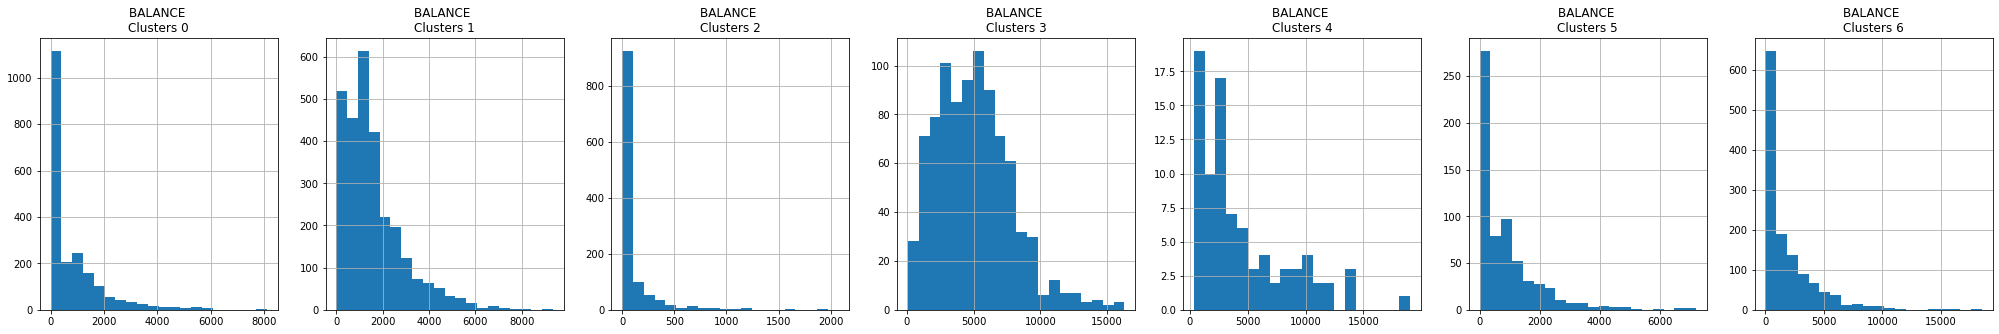

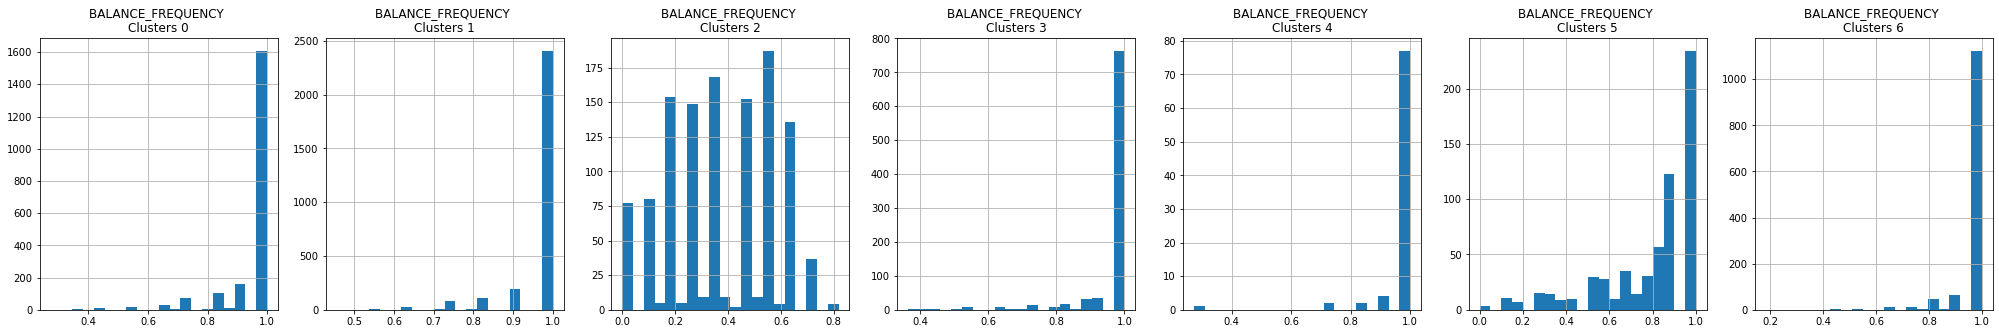

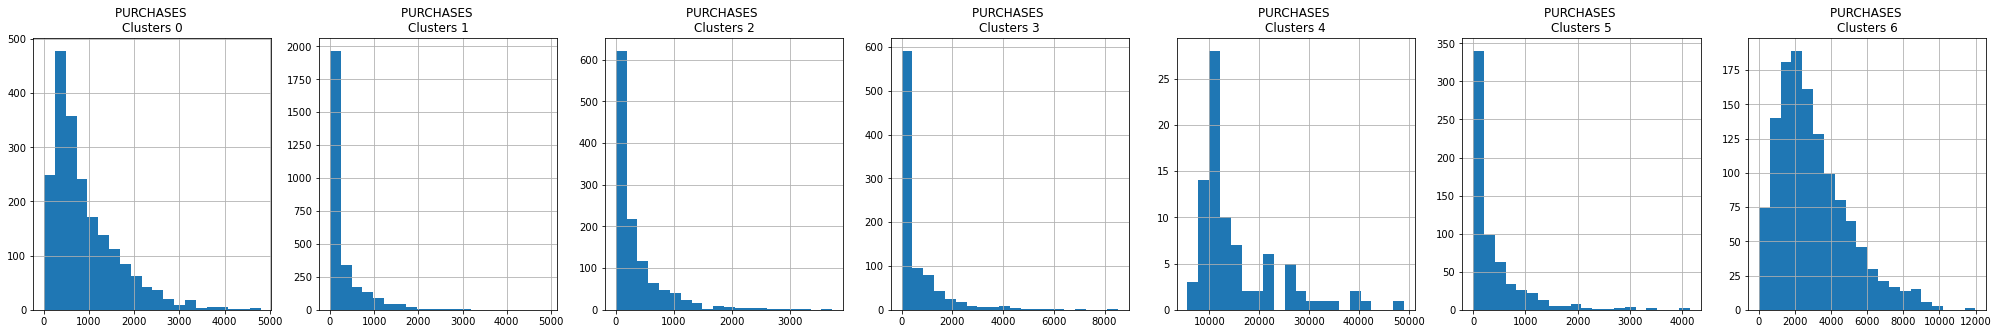

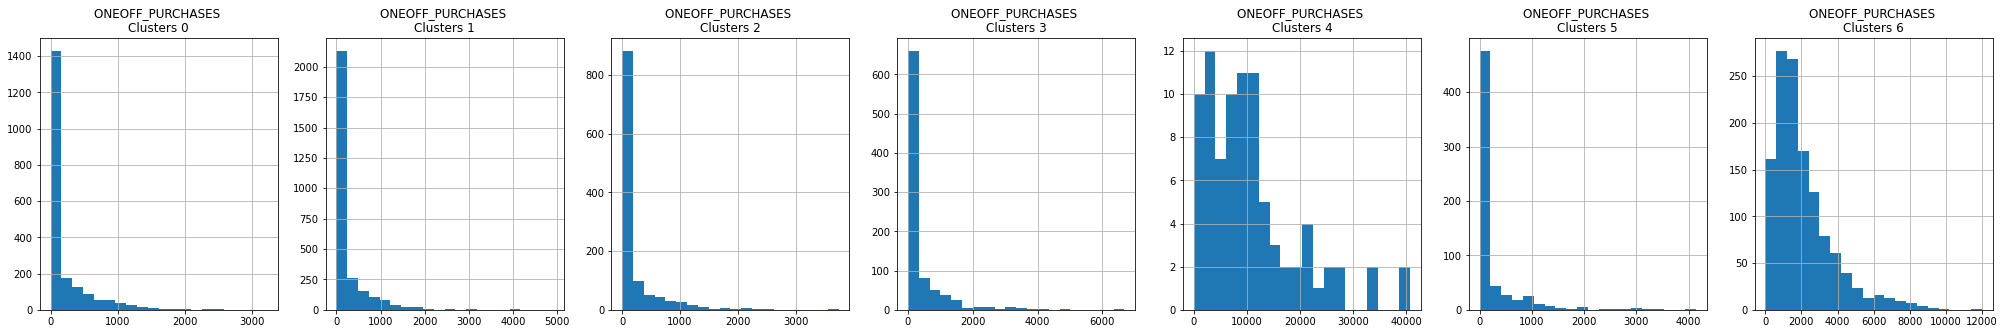

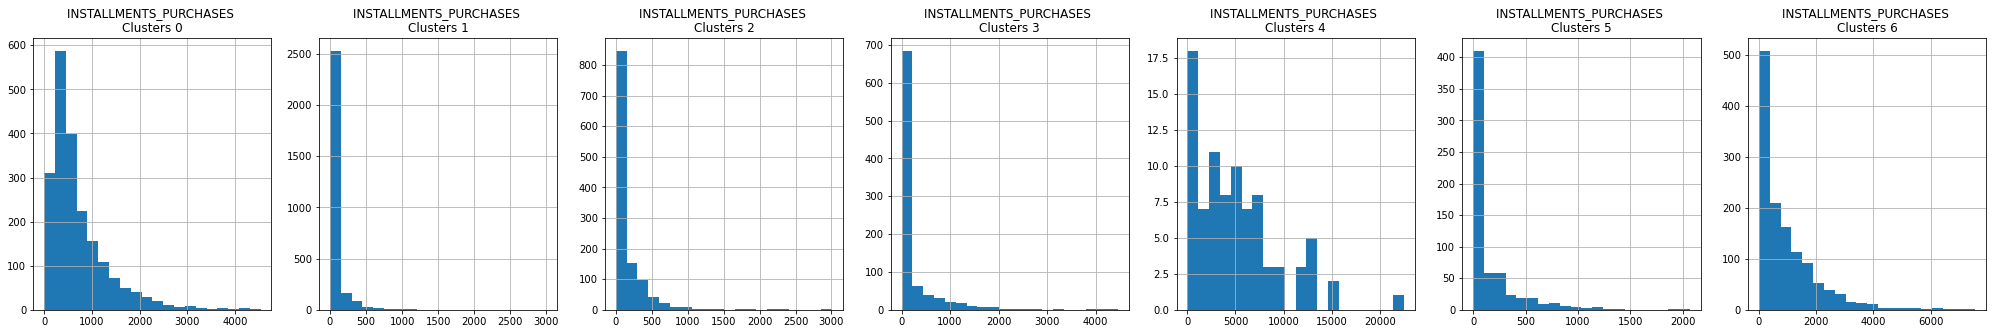

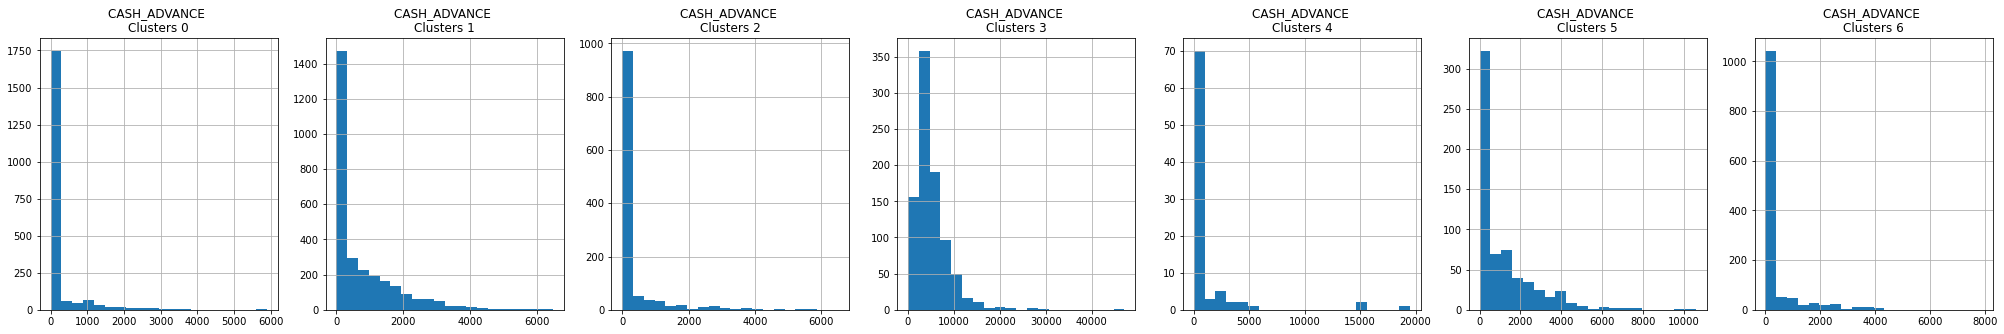

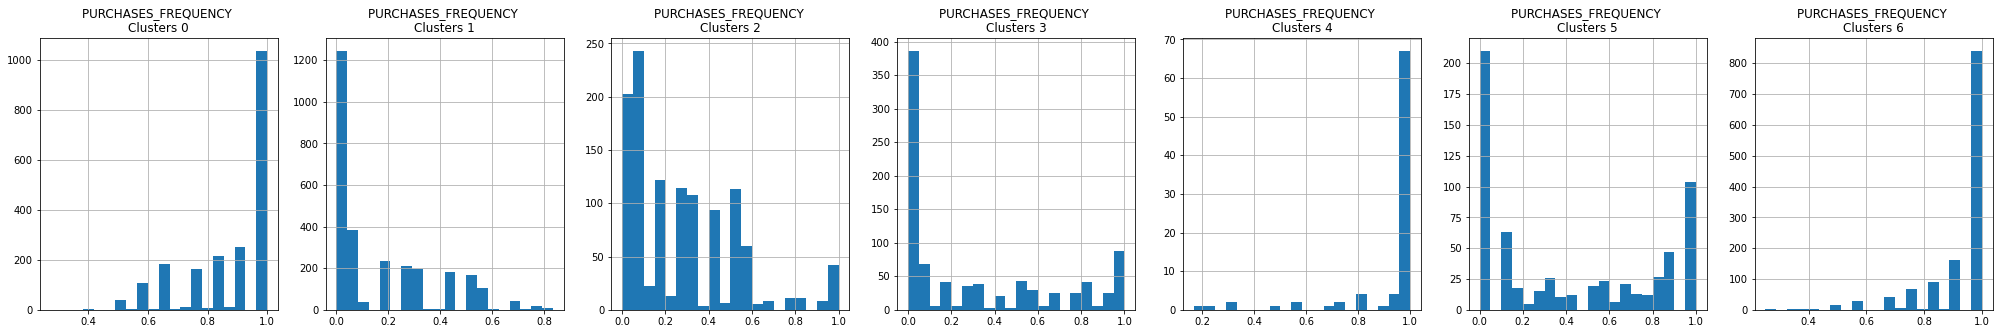

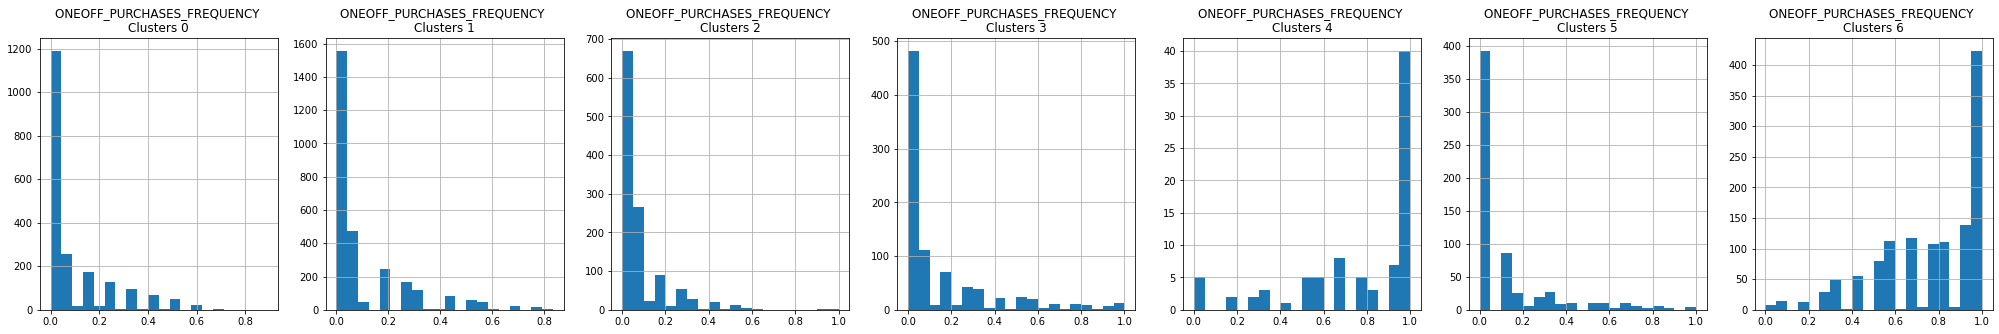

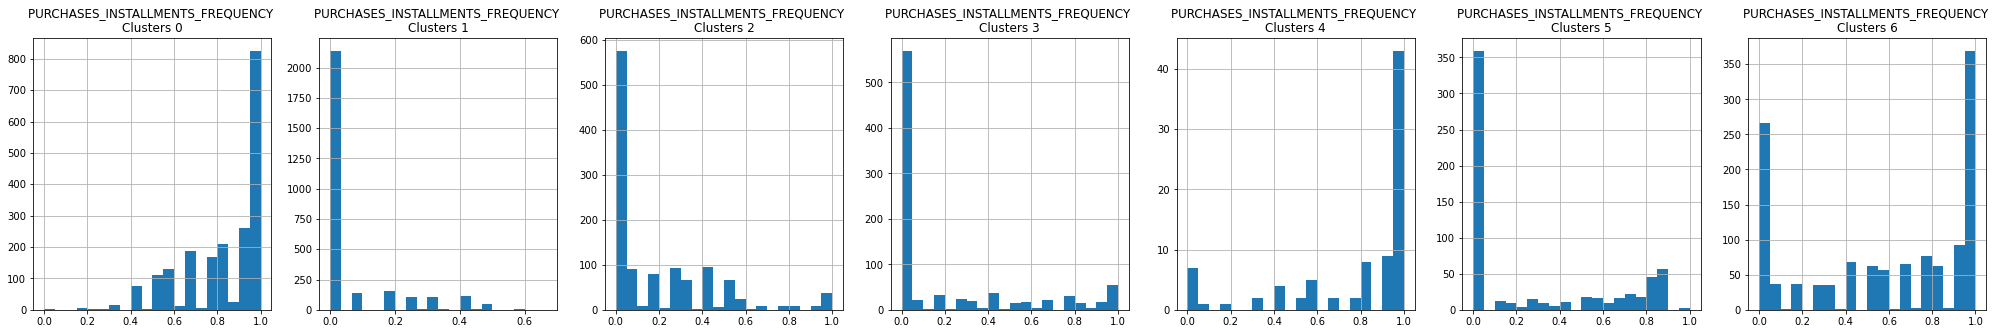

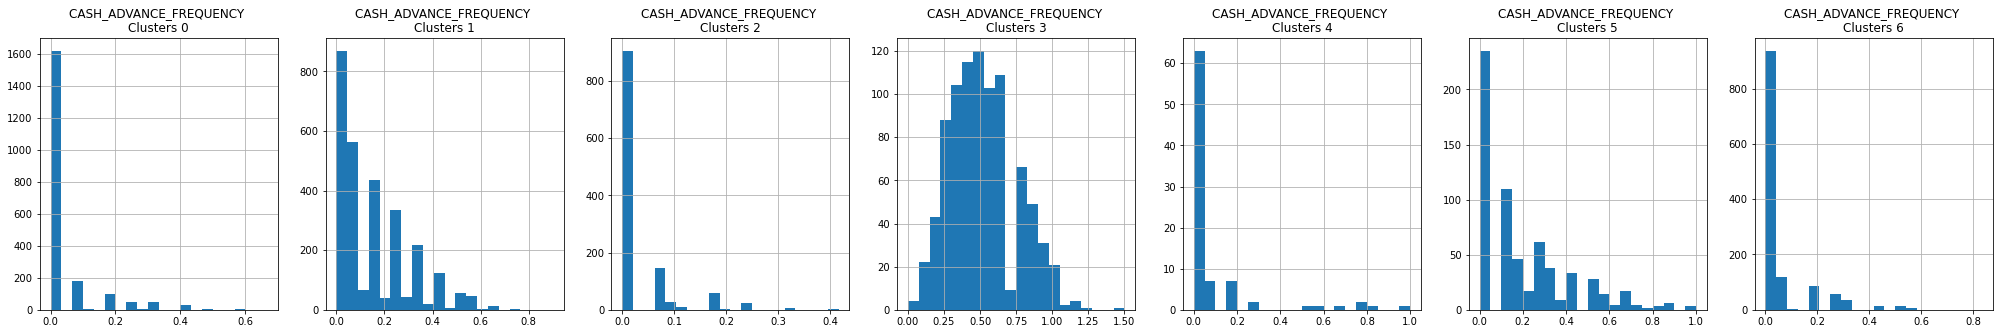

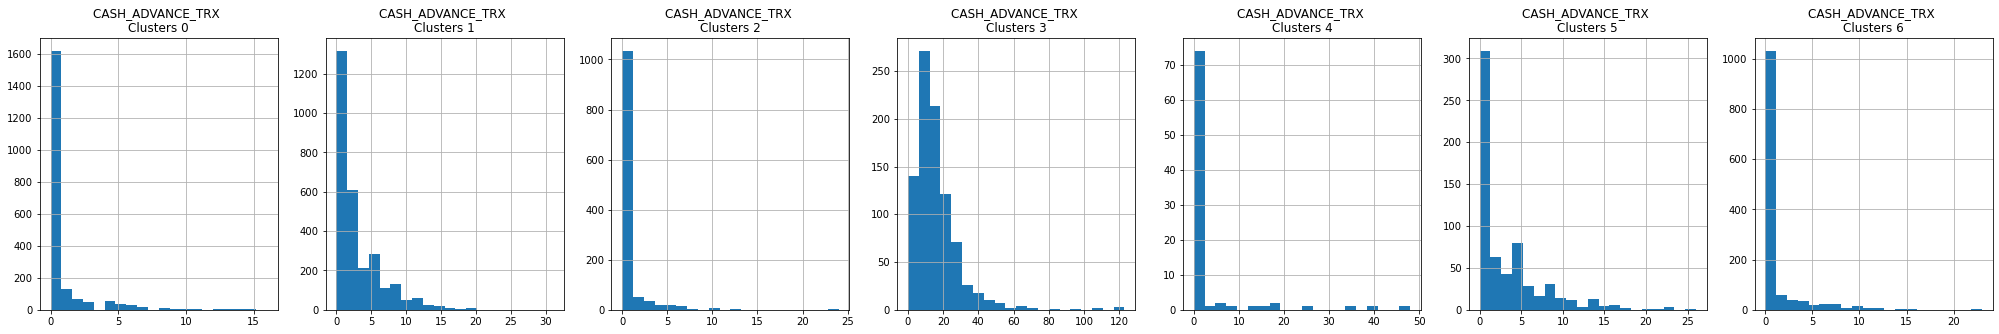

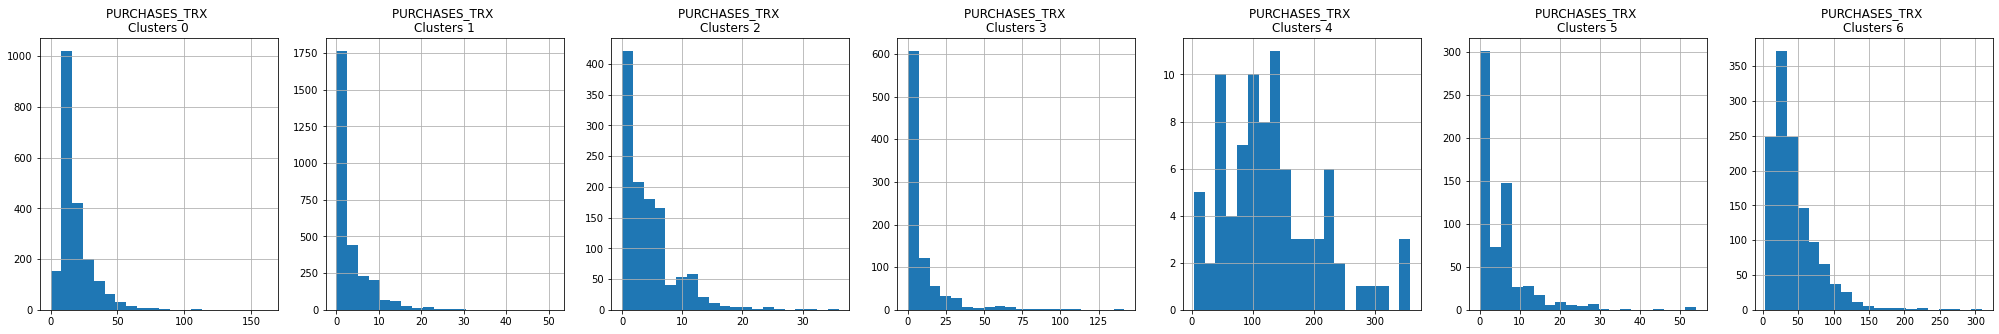

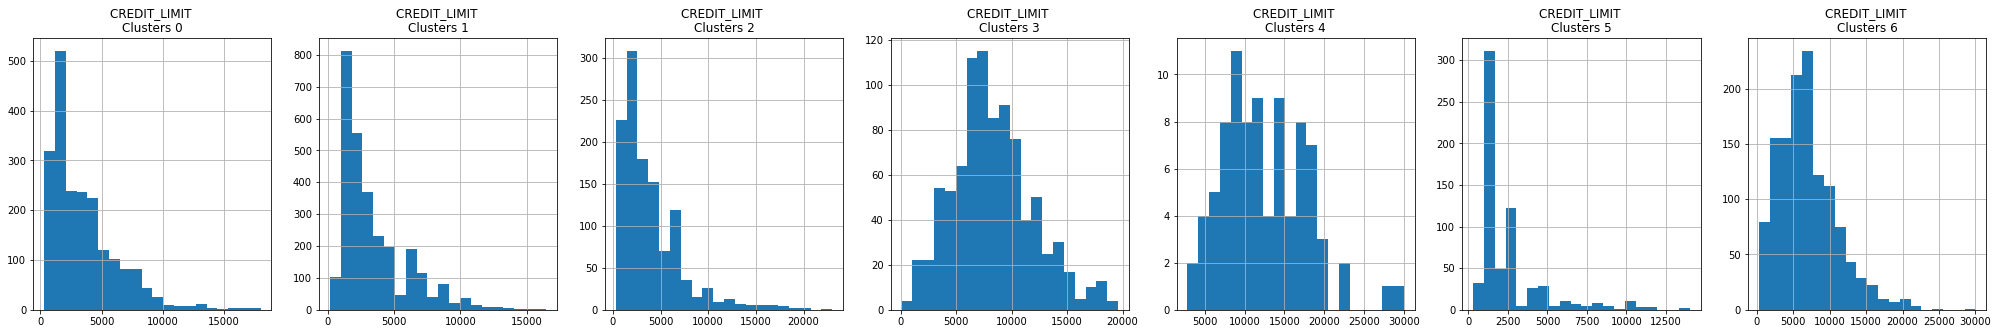

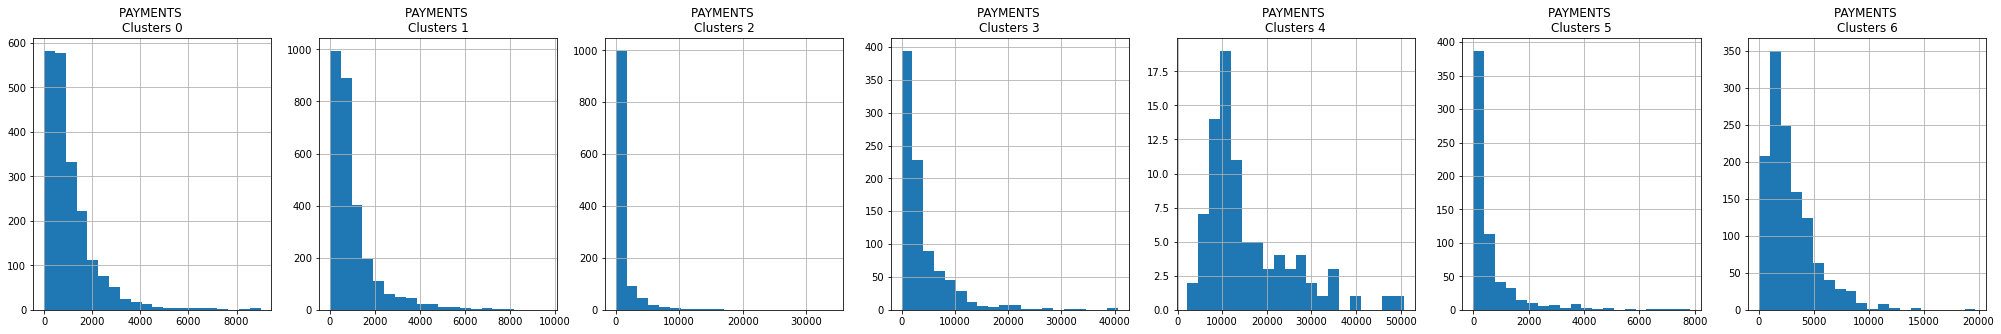

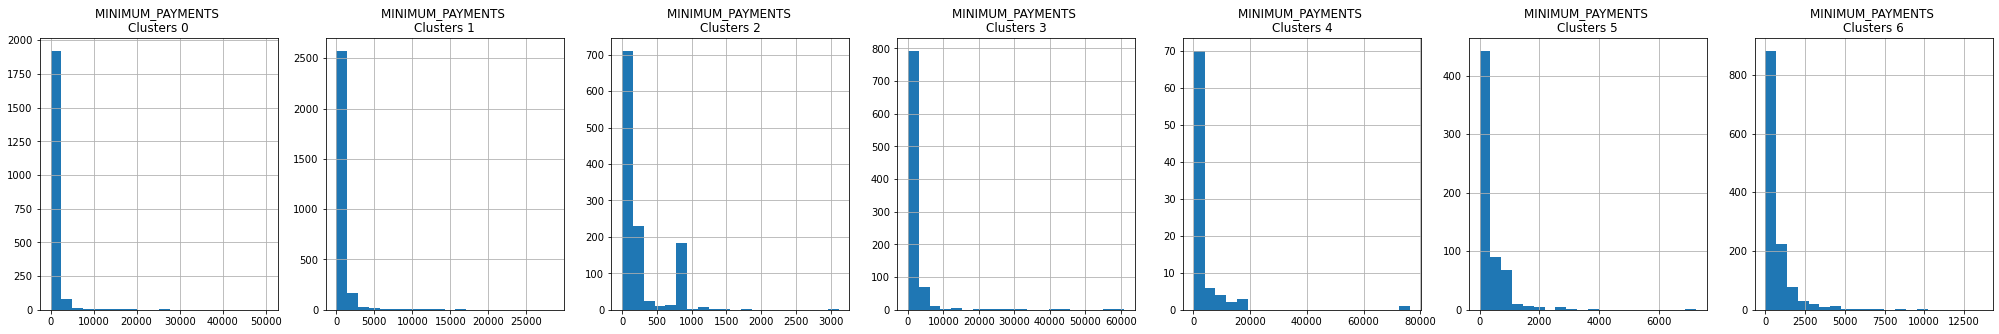

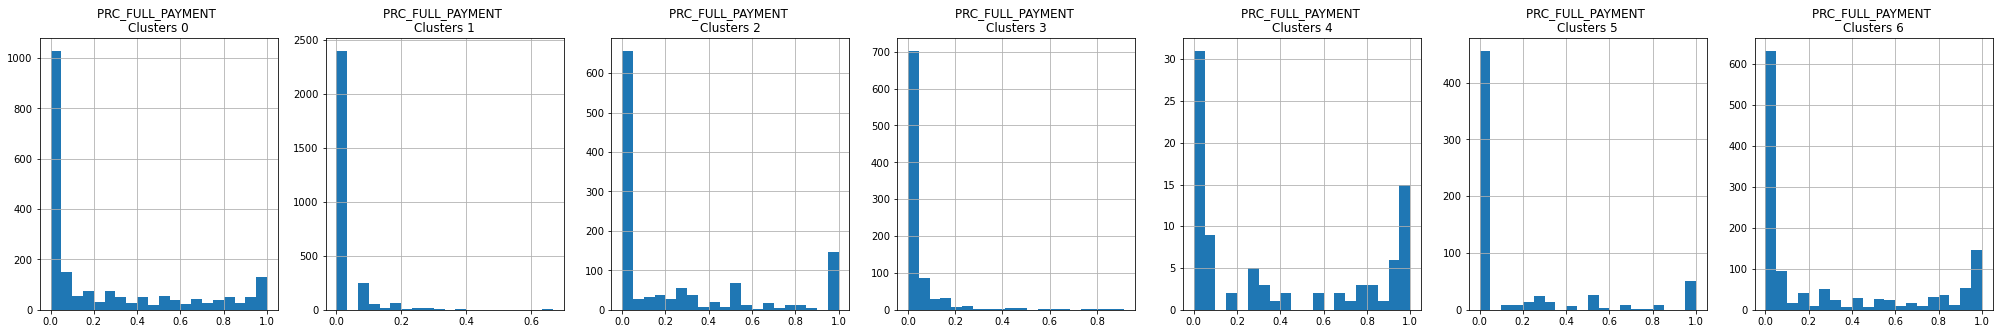

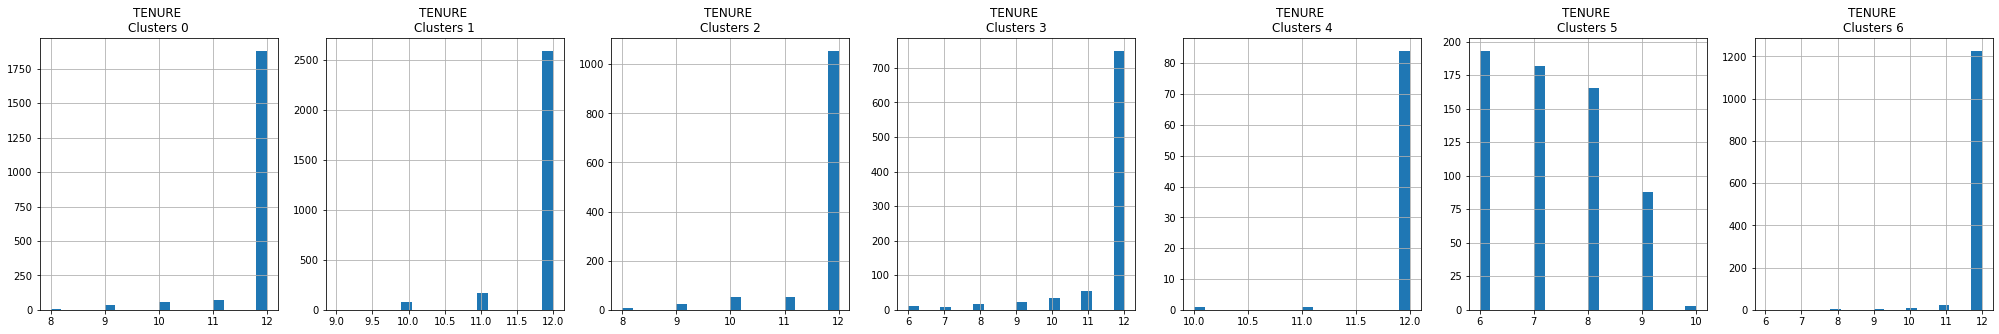

In [194]:
#Plot the histogram of various clusters
for i in creditcard_df.columns:
    plt.figure(figsize = (35,5))
    for j in range(7):
        plt.subplot(1, 7, j+1)
        clusters = creditcard_cluster[creditcard_cluster['Cluster'] == j]
        clusters[i].hist(bins = 20)
        plt.title('{} \nClusters {}'.format(i,j))
plt.show()

## Applying Principal Component Analysis (PCA) and Visualize the results

In [199]:
pca = PCA(n_components=2)
principal_component = pca.fit_transform(creditcard_df_scaled)
principal_component

array([[-1.68222199, -1.07646353],
       [-1.13829707,  2.50647868],
       [ 0.96969   , -0.38346726],
       ...,
       [-0.92620532, -1.81080717],
       [-2.33655528, -0.65800907],
       [-0.55641983, -0.40045551]])

In [200]:
pca_df = pd.DataFrame(data = principal_component, columns = ['pca1', 'pca2'])

In [202]:
pca_df.head()

,pca1,pca2
0,-1.682222,-1.076464
1,-1.138297,2.506479
2,0.969690,-0.383467
3,-0.873630,0.043154
4,-1.599435,-0.688590


In [203]:
pca_df = pd.concat([pca_df, pd.DataFrame({'Clusters' : labels})], axis = 1)

In [205]:
pca_df.head()

,pca1,pca2,Clusters
0,-1.682222,-1.076464,1
1,-1.138297,2.506479,3
2,0.969690,-0.383467,6
3,-0.873630,0.043154,1
4,-1.599435,-0.688590,1


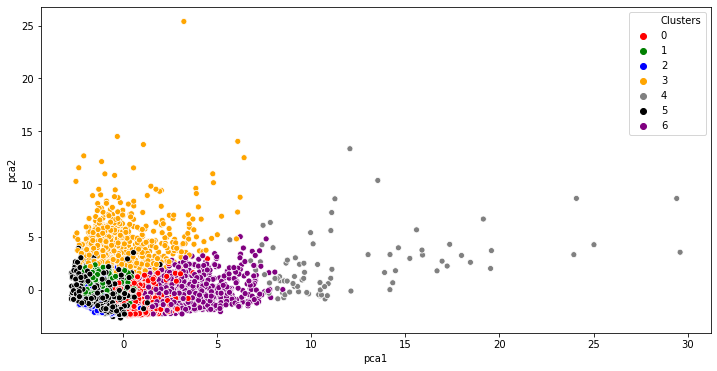

In [214]:
plt.figure(figsize = (12, 6))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'Clusters', data = pca_df, 
                     palette = ['red', 'green', 'blue', 'orange', 'grey', 'black', 'purple'])
plt.show()